# **Hate Speech Recognition**


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## We use count vecotrizer in order to convert the word into an array of numbers since predictions are easy with numbers

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import matplotlib.pyplot as plt
data=pd.read_csv('labeled_data.csv')
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


*   0-Hate Speech

*   1-Offensive Language

*   2 - Neither






In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


(24783, 7)

#value_counts counts unique values from the given data or column
###plt.pie(values,labels,autopct,startangle,explode,colors,Shadow=bool)


Class 
1    19190
2     4163
0     1430
Name: class, dtype: int64


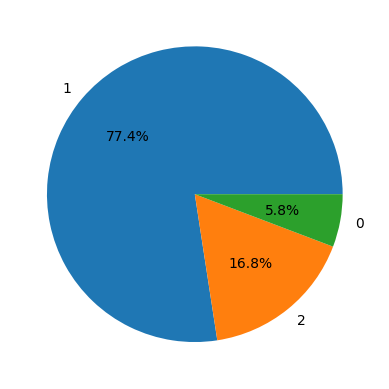

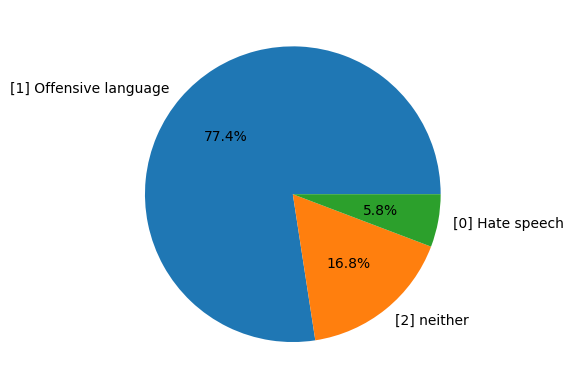

In [ ]:
class_values=data['class'].value_counts()
print('Class ')
print(class_values)
plt.pie(class_values,labels=data['class'].value_counts().index,autopct='%1.1f%%')
plt.show()
plt.pie(class_values,labels=['[1] Offensive language','[2] neither','[0] Hate speech'],startangle=0,autopct='%1.1f%%')
plt.show()


##We have to resample classes 0 and 2 in order to gain a better accuracy for our model

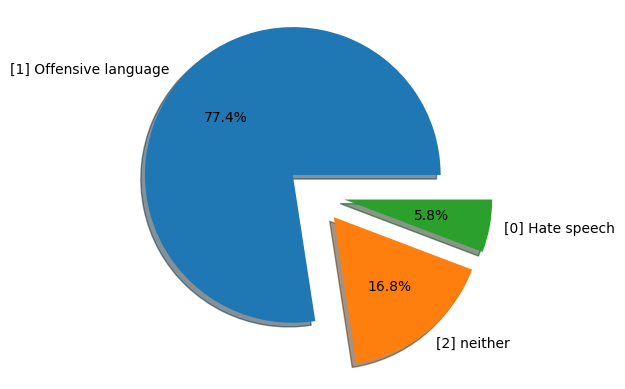

In [ ]:
myexplode=[0.2,0.2,0.2]
plt.pie(class_values,labels=['[1] Offensive language','[2] neither','[0] Hate speech'],startangle=0,autopct='%1.1f%%',shadow=True,explode=myexplode)
plt.show()

#seaborn:
 Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

#sklearn.model_selection:
 This module from scikit-learn provides functions for splitting datasets into training and testing sets. It's commonly used for machine learning tasks.

#nltk:
NLTK (Natural Language Toolkit) is a library for working with human language data. You're downloading some resources from NLTK, including stopwords, WordNet, and the Open Multilingual Wordnet.

#stopwords:
 NLTK's stopwords module provides a list of common words (e.g., "the," "is," "and") that are often removed from text data because they typically don't carry meaningful information.

#WordNetLemmatizer:
Word lemmatization is the process of reducing a word to its base or root form. NLTK's WordNetLemmatizer is used for this purpose.

#wordcloud:
This library is used for creating word clouds, which are visual representations of text data where words are displayed in different sizes based on their frequency in the text.

#tensorflow and keras:
These libraries are used for building and training deep learning models. TensorFlow is the backend for Keras in this context.

#Tokenizer and pad_sequences from tensorflow.keras.preprocessing.text:
 These classes are used for tokenizing and padding sequences of text. Tokenization is the process of splitting text into words or tokens, and padding is often necessary to ensure that all input sequences have the same length, which is required by many machine learning models.


In [ ]:
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#import string
imports the Python string module. The string module provides a collection of constants (e.g., string.ascii_letters, string.digits) and some utility functions for working with strings in Python.

##str.maketrans('text_to_replace','text_to_be_replaced_with','text_to_be_deleted')
punc to be deleted from the data
return text.translate(str.maketrans('','',punc))
##text.translate is used to initialize str.maketrans
data['tweet2']=data['tweet'].apply(lambda x: removeP(x))
##*lambda function is an anonymous function that is used when the task at hand is small and does not require an explicit funtion. In other words it's just a short form or one liner for a small functio*n
##.apply is used to apply the changes to all rows in the dataset


In [ ]:
import string
data['tweet']=data['tweet'].str.lower()
punc=string.punctuation
def removeP(text):
  return text.translate(str.maketrans('','',punc))
data['tweet2']=data['tweet'].apply(lambda x: removeP(x))
print(data['tweet2'])

0         rt mayasolovely as a woman you shouldnt compl...
1         rt mleew17 boy dats coldtyga dwn bad for cuff...
2         rt urkindofbrand dawg rt 80sbaby4life you eve...
3           rt cganderson vivabased she look like a tranny
4         rt shenikaroberts the shit you hear about me ...
                               ...                        
24778    yous a muthafin lie 8220lifeasking 20pearls co...
24779    youve gone and broke the wrong heart baby and ...
24780    young buck wanna eat dat nigguh like i aint fu...
24781                youu got wild bitches tellin you lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet2, Length: 24783, dtype: object


#stop_words
###are words that don't add much meaning to the sentence.   Ex:-['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"....]
#stemming
###is the process of removing the last few characters of a word even if it is meaningless
#Lemmatization
###is the process of shortening the word in order to covert it to a verb.

# Inserting 'rt' to stop words as it is not meaningful for our model

In [ ]:
stop_words=stopwords.words('english')
stop_words.insert(0,'rt')
print(stop_words)

['rt', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'th

```
str(text).split()
```
splits the sentence into individual words
#*lemmatize* shortens the word into base meaning and append that word to imp_words.
#*.join* is used to combine the words into a sentence




In [ ]:
def normalize(text):
  imp_words=[]
  for word in str(text).split():
    if word not in stop_words:
      lemmatizer=WordNetLemmatizer()
      lemmatizer.lemmatize(word)
      imp_words.append(word)
  output=' '.join(imp_words)
  return output

In [ ]:
data['tweet2']=data['tweet2'].apply(lambda x: normalize(x))
print(data['tweet2'])

0        mayasolovely woman shouldnt complain cleaning ...
1        mleew17 boy dats coldtyga dwn bad cuffin dat h...
2        urkindofbrand dawg 80sbaby4life ever fuck bitc...
3                    cganderson vivabased look like tranny
4        shenikaroberts shit hear might true might fake...
                               ...                        
24778    yous muthafin lie 8220lifeasking 20pearls core...
24779    youve gone broke wrong heart baby drove rednec...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                    youu got wild bitches tellin lies
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet2, Length: 24783, dtype: object


###***Word cloud*** is one of the most powerful and straightforward visualization methods when it comes to text data. The size of words are dependent on the occurrence frequency (text’s importance in the context), therefore it comes in handy for Natural Language Processing machine learning projects or text analysis.
```
WordCloud(background_color,max_words,height,width,colormap,stopwords)
```

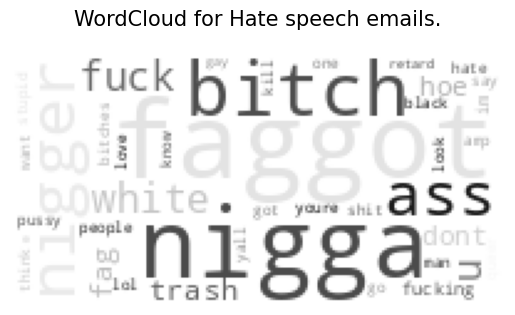

None


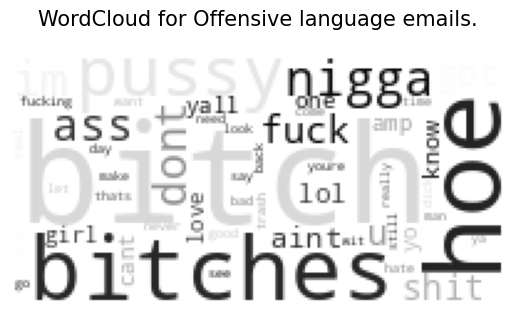

None


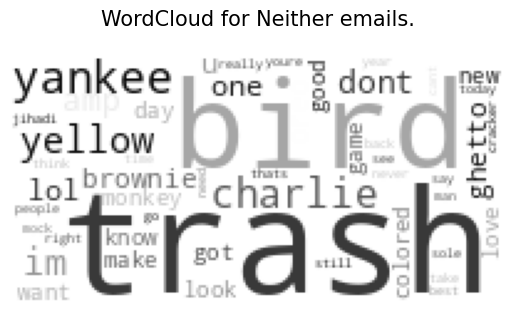

None


In [ ]:
def word_cloud(data,typ):
  tweets=" ".join(data['tweet2'])

  wc= WordCloud(max_words=50,width=200,height=100,collocations=False,colormap='binary',background_color='white').generate(tweets)
  plt.axis('off')
  plt.imshow(wc)
  plt.title(f'WordCloud for {typ} emails.\n', fontsize = 15)
  plt.show()
print(word_cloud(data[data['class']==0],typ='Hate speech'))

print(word_cloud(data[data['class']==1],typ='Offensive language'))

print(word_cloud(data[data['class']==2],'Neither'))

In [ ]:
class_2 = data[data['class'] == 2]
class_1 = data[data['class'] == 1].sample(n=3500)
class_0 = data[data['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)

## now that our classes have been balanced we can go ahead and train our model

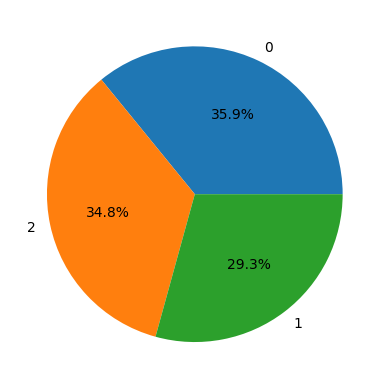

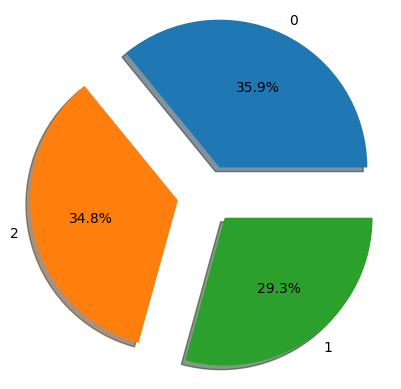

In [ ]:

plt.pie(balanced_df['class'].value_counts().values,
        labels=balanced_df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()
plt.pie(balanced_df['class'].value_counts().values,
        labels=balanced_df['class'].value_counts().index,
        autopct='%1.1f%%',explode=myexplode,shadow=True)
plt.show()

In [ ]:
balanced_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet2
85,85,3,2,1,0,0,"""@blackman38tide: @whalelookyhere @howdydowdy1...",blackman38tide whalelookyhere howdydowdy11 que...
89,90,3,3,0,0,0,"""@cb_baby24: @white_thunduh alsarabsss"" hes a ...",cbbaby24 whitethunduh alsarabsss hes beaner sm...
110,111,3,3,0,0,0,"""@devilgrimz: @vigxrarts you're fucking gay, b...",devilgrimz vigxrarts youre fucking gay blackli...
184,186,3,3,0,0,0,"""@markroundtreejr: lmfaoooo i hate black peopl...",markroundtreejr lmfaoooo hate black people htt...
202,204,3,2,1,0,0,"""@nochillpaz: ""at least i'm not a nigger"" http...",nochillpaz least im nigger httptcorgja7cfoit l...
...,...,...,...,...,...,...,...,...
24736,25249,3,0,0,3,2,yaya ho.. cute avi tho rt @vivala_ari i had no...,yaya ho cute avi tho vivalaari idea sleep 128553
24737,25250,3,0,1,2,2,yea so about @n_tel 's new friend.. all my fri...,yea ntel new friend friends kno theyre allowed...
24767,25280,3,0,1,2,2,"you know what they say, the early bird gets th...",know say early bird gets worm puts gummy worms...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",youve gone broke wrong heart baby drove rednec...


In [ ]:
cv=CountVectorizer()
y=balanced_df['class']
X=cv.fit_transform(balanced_df['tweet2'])

## Splitting our model into training and testing parts

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## We are using Decision tree algorithm as the problem that we have in hand is a classification problem where we have to determine weather the sentence or speech is a hate speech or just a normal sentence

In [ ]:
cif=DecisionTreeClassifier()

In [ ]:
cif.fit(X_train,Y_train)

DecisionTreeClassifier()

# Sorry for my offensive[0] testing :)

In [ ]:
test_data='i will fuck you'
tt=removeP(test_data)
tt=normalize(tt)
df=cv.transform([tt]).toarray()
print(cif.predict(df))

[0]


## Calculating the f1_score

In [ ]:
f1_score(cif.predict(X_val),Y_val,average='macro')

0.8932887632920238

## i am creating a function to predict my speech
## I will be importing this function in another pyython file and predict it from there

In [ ]:
def predicting(text):
  df=removeP(text)
  df=normalize(text)
  df=cv.transform([text]).toarray()
  result = cif.predict(df)
  if result==1:
    return '!!!!!!!!!!!!!OFFENSIVE LANGUAGE DETECTED!!!!!!!!!!!!!!!!!! PLEASE REFRAIN FROM BEING TOXIC :)'
  elif result ==0:
    return "!!!!!!!HATE SPEECH!!!!!!!! PLEASE CALM DOWN"
  else:
    return 'You are a peaceful person :). May Allah/Jesus/God bless you<3'


In [ ]:
predicting('love you')

'You are a peaceful person :). May Allah/Jesus/God bless you<3'